In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_terpi_tfidf.csv")

In [3]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Terpinolene
0,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42965,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.261458,0.0,...,0,0,0,0,0,0,0,0,0,0.0
74996,42965,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.261458,0.0,...,0,0,0,0,0,0,0,0,0,0.0
74997,42970,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0
74998,42972,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0


Splitting dependent and independent variables

In [4]:
X = df_knn.drop(['X..Terpinolene', 'index'], axis = 1)
y = df_knn[['X..Terpinolene']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

<AxesSubplot:ylabel='Count'>

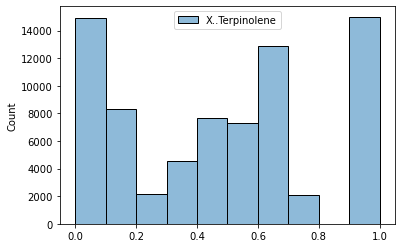

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [10]:
mean_absolute_error(y_val, y_pred_knreg)

0.04799952174024807

In [11]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.915217839473822

In [12]:
#val
r2_score(y_val, y_pred_knreg)

0.8595395823537679

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([1.89185318e-03, 1.58245013e-03, 7.76059333e-04, 1.20091492e-03,
       1.92440328e-03, 1.77607595e-03, 1.49639190e-03, 2.22852136e-03,
       1.78308490e-04, 8.36668683e-04, 3.13600160e-04, 1.20605714e-03,
       1.81777779e-04, 4.28440992e-04, 8.10796242e-04, 2.00300302e-03,
       1.26303844e-03, 4.67206988e-03, 1.63560586e-04, 7.53738813e-04,
       1.25147111e-03, 1.58945696e-03, 8.50757847e-03, 4.16863923e-04,
       2.64105760e-04, 4.48565295e-04, 4.97219352e-04, 2.70165181e-04,
       6.84163615e-04, 1.66370255e-03, 7.19542512e-03, 1.86467440e-04,
       1.78964186e-03, 2.16020130e-04, 5.10385258e-04, 6.12099118e-04,
       6.50281167e-04, 1.77704540e-03, 5.16661224e-04, 1.40177529e-03,
       2.62129197e-04, 9.62709463e-04, 2.56149226e-04, 3.09865917e-03,
       1.29468151e-03, 1.06356032e-03, 1.59369495e-03, 5.39303892e-04,
       1.51983965e-03, 1.30764572e-03, 8.11465727e-05, 7.01604946e-05,
       1.75266440e-04, 1.12693098e-03, 9.75708886e-04, 1.39309016e-04,
      

In [16]:
selector.threshold_

0.0021321961620469083

In [17]:
mask = selector.get_support()

In [18]:
mask

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_7,tfidf_17,tfidf_22,tfidf_30,tfidf_43,tfidf_65,tfidf_69,tfidf_73,tfidf_89,tfidf_93,...,uplifted,berry,cheese,diesel,earthy,lemon,lime,orange,sweet,vanilla
0,0.000000,0.0,0.0,0.000000,0.0,0.206994,0.0,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.0,0.0,0.000000,0.0,0.206994,0.0,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.0,0.0,0.000000,0.0,0.206994,0.0,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.0,0.0,0.000000,0.0,0.206994,0.0,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.0,0.0,0.000000,0.0,0.206994,0.0,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.261458,0.0,0.0,0.256018,0.0,0.000000,0.0,0.238134,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
74996,0.261458,0.0,0.0,0.256018,0.0,0.000000,0.0,0.238134,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
74997,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.108601,...,0,0,0,0,0,0,0,0,0,0
74998,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['tfidf_7',
 'tfidf_17',
 'tfidf_22',
 'tfidf_30',
 'tfidf_43',
 'tfidf_65',
 'tfidf_69',
 'tfidf_73',
 'tfidf_89',
 'tfidf_93',
 'tfidf_95',
 'tfidf_104',
 'tfidf_117',
 'tfidf_121',
 'tfidf_128',
 'tfidf_141',
 'tfidf_144',
 'tfidf_145',
 'tfidf_149',
 'tfidf_155',
 'tfidf_161',
 'tfidf_168',
 'tfidf_175',
 'tfidf_178',
 'tfidf_187',
 'tfidf_189',
 'tfidf_193',
 'tfidf_195',
 'tfidf_199',
 'tfidf_205',
 'tfidf_207',
 'tfidf_210',
 'tfidf_211',
 'tfidf_239',
 'tfidf_245',
 'tfidf_248',
 'tfidf_253',
 'tfidf_258',
 'tfidf_260',
 'tfidf_281',
 'tfidf_282',
 'tfidf_283',
 'tfidf_285',
 'tfidf_309',
 'tfidf_312',
 'tfidf_314',
 'tfidf_329',
 'tfidf_337',
 'tfidf_340',
 'tfidf_345',
 'tfidf_348',
 'tfidf_353',
 'tfidf_355',
 'tfidf_357',
 'tfidf_361',
 'tfidf_362',
 'tfidf_366',
 'tfidf_367',
 'tfidf_381',
 'tfidf_382',
 'tfidf_385',
 'hybrid',
 'indica',
 'sativa',
 'dry eyes',
 'dry mouth',
 'energetic',
 'euphoric',
 'focused',
 'happy',
 'relaxed',
 'talkative',
 'uplifted',
 'berry',


In [22]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_terpi.pkl")
joblib.dump(selector, "selector_knn_tfidf_terpi.pkl")

['selector_knn_tfidf_terpi.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [26]:
mean_absolute_error(y_val, y_pred_knreg)

0.044470655356339574

In [27]:
mean_squared_error(y_val, y_pred_knreg)

0.01318657169436768

In [28]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.11483279886150856

In [29]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9359370033991142

In [30]:
#val
r2_score(y_val, y_pred_knreg)

0.8887426183910786

Hyperparameter Tuning

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 7}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.027518746967573924

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.009320079410076215

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.09654055836836772

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9910153555394583

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.9213648812150925

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [41]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [42]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_terpi.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_terpi.pkl")

['y_test_knreg_tfidf_terpi.pkl']

In [43]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.027216449097293587

In [44]:
r2_score(y_test, y_pred_knreg_test)

0.9194670155214814

In [45]:
mean_squared_error(y_test, y_pred_knreg_test)

0.009636276922880393

In [46]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.09816454004822919

In [47]:
y_test

,X..Terpinolene
11591,1.000000
52020,0.536842
34666,0.659649
22169,0.242105
23049,0.631579
...,...
60863,0.452632
32316,0.659649
60933,0.452632
43206,0.192982


In [48]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

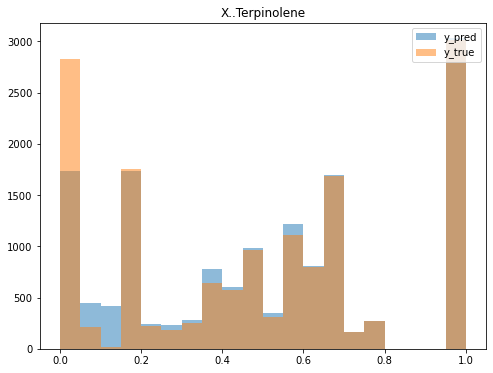

<Figure size 432x288 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Terpinolene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_terpi.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.960
P-value: 0.000


<AxesSubplot:>

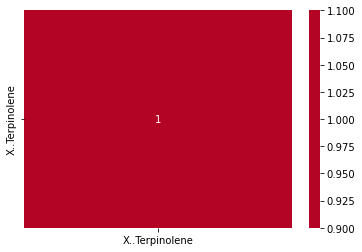

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)